In [0]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d sidtwr/videogames-sales-dataset

mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/507k [00:00<?, ?B/s]
100% 507k/507k [00:00<00:00, 75.5MB/s]


In [0]:
import os
import zipfile
with zipfile.ZipFile('/content/videogames-sales-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

os.listdir("/content/sample_data")

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

xbox = pd.read_csv('/content/XboxOne_GameSales.csv',engine='python')
ps4  = pd.read_csv('/content/PS4_GamesSales.csv',engine='python')
game = pd.read_csv('/content/Video_Games_Sales_as_at_22_Dec_2016.csv',engine='python')


In [0]:
game = game.drop(['Critic_Score','Critic_Count','User_Score','User_Count','Developer','Rating'],axis = 1)

In [0]:
game.groupby('Publisher').filter(lambda x: len(x) > 50)['Publisher'].value_counts()#nunique()

Electronic Arts                           1356
Activision                                 985
Namco Bandai Games                         939
Ubisoft                                    933
Konami Digital Entertainment               834
THQ                                        715
Nintendo                                   706
Sony Computer Entertainment                687
Sega                                       638
Take-Two Interactive                       422
Capcom                                     386
Atari                                      367
Tecmo Koei                                 348
Warner Bros. Interactive Entertainment     235
Square Enix                                234
Disney Interactive Studios                 218
Unknown                                    201
Midway Games                               198
Eidos Interactive                          198
505 Games                                  191
Microsoft Game Studios                     191
Acclaim Enter

In [0]:
game.shape

(16719, 10)

In [0]:
game.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [0]:
xbox.columns

Index(['Pos', 'Game', 'Year', 'Genre', 'Publisher', 'North America', 'Europe',
       'Japan', 'Rest of World', 'Global'],
      dtype='object')

In [0]:
ps4.columns

Index(['Game', 'Year', 'Genre', 'Publisher', 'North America', 'Europe',
       'Japan', 'Rest of World', 'Global'],
      dtype='object')

In [0]:
xbox = xbox.rename({'Game':'Name','Year' :'Year_of_Release',
             'North America':'NA_Sales','Europe':'EU_Sales',
             'Japan':'JP_Sales','Rest of World':'Other_Sales',
             'Global': 'Global_Sales'},axis = 'columns')
xbox = xbox.drop(['Pos'],axis = 1)
ps4 = ps4.rename({'Game':'Name','Year' :'Year_of_Release',
             'North America':'NA_Sales','Europe':'EU_Sales',
             'Japan':'JP_Sales','Rest of World':'Other_Sales',
             'Global': 'Global_Sales'},axis = 'columns')

In [0]:
xbox.columns

Index(['Name', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales',
       'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [0]:
game['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [0]:
xbox['Platform'] = 'XOne' 
ps4['Platform'] = 'PS4' 

In [0]:
game1 = pd.concat([game,xbox,ps4])

In [0]:
game[(game['Name'].isin(list(ps4['Name'].unique()))) & (game['Platform'] == 'PS4')].count()

Name               373
Platform           373
Year_of_Release    373
Genre              373
Publisher          373
NA_Sales           373
EU_Sales           373
JP_Sales           373
Other_Sales        373
Global_Sales       373
dtype: int64

In [0]:
game[(game['Name'].isin(list(xbox['Name'].unique()))) & (game['Platform'] == 'XOne')]

In [0]:
ps4.shape

(1034, 10)

In [0]:
xbox.shape

(613, 10)

In [0]:
game[game['NA_Sales'] == 0.00]

In [0]:
game['Genre'].value_counts()

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

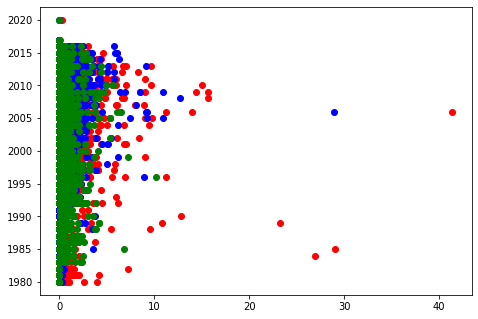

In [0]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
y = game['Year_of_Release']
x1 = game['NA_Sales']
x2 = game['EU_Sales']
x3 = game['JP_Sales']
ax.scatter(x1,y ,color='r')
ax.scatter(x2,y ,color='b')
ax.scatter(x3,y, color='g')
plt.show()

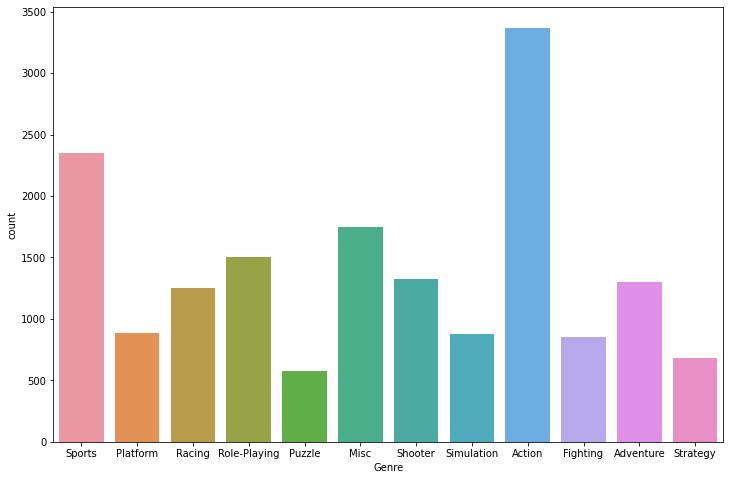

In [0]:
plt.gcf().set_size_inches(12,8)
sns.countplot(game['Genre'])